For the power planet there are seven different types of variables.  They feature the average ambient variables like Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V), and electrical energy output (EP).  Electrical energy output (EP) is used to predict the net hourly of the power planet for each variable.  

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day1/Day1_Data.csv'
df = pd.read_csv(url)
#columns_titles = ["EP","T",'V','AP','RH']
#df=df.reindex(columns=columns_titles)
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


The columns on the side are the hours for each variable and they are only for the first four hours and how much net hourly is for each variable. The letters on the top are the variables.  For Temperature (T) it shows that less than an hour the net hourly is 14.96, while 2 hours is 5.11. 

In [ ]:
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.agg(['skew','kurt','sem'])

,T,V,AP,RH,EP
skew,-0.136393,0.198521,0.265445,-0.431839,0.306509
kurt,-1.037549,-1.444337,0.094237,-0.444526,-1.048521
sem,0.076189,0.129916,0.060714,0.149262,0.174480


In [ ]:
from scipy import stats as bob  
for col in df.columns:
  a = bob.hmean(df[col])
  b = bob.gmean(df[col])
  print(col + ':\t' + str(a) + '\t' + str(b))

T:	15.96072079292619	17.95937222625265
V:	51.38438409398994	52.82358194949038
AP:	1013.2243258257025	1013.2416934519393
RH:	69.87838140238046	71.69111290023949
EP:	453.73054434330743	454.04664374024685


In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()

In [19]:
#Correlation matrix
df.corr()

,T,V,AP,RH,EP
T,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
EP,-0.948128,-0.869780,0.518429,0.389794,1.000000


In the chart above shows the amount of output for each variable and shows which ones have a strong relationship with one another.  For example like variable T and V.  In the graph below it also shows that.  

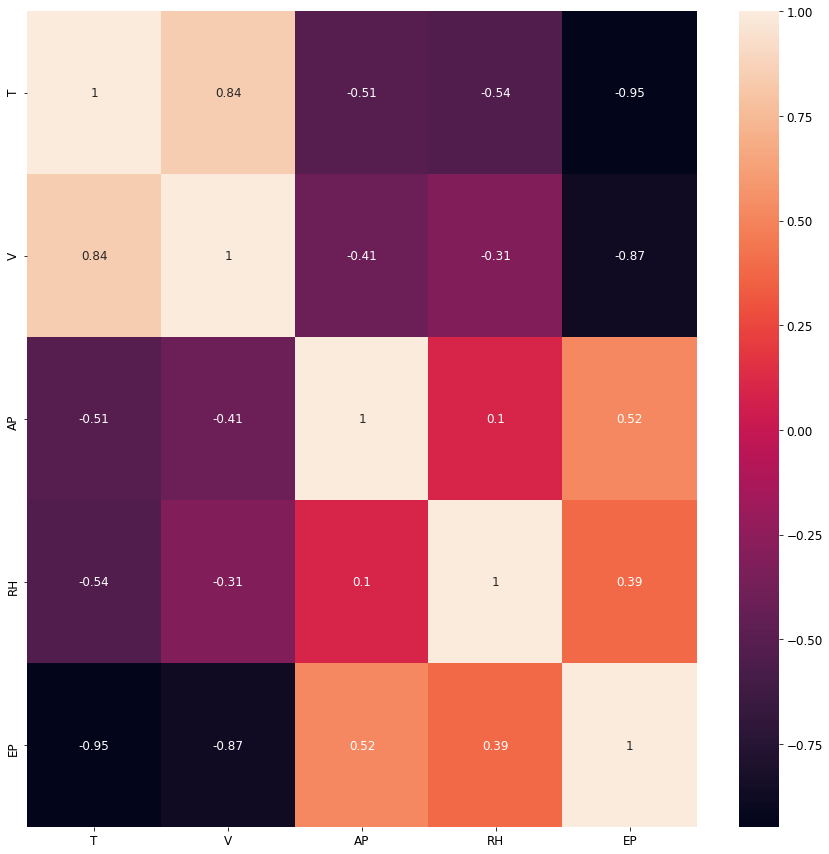

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

This graph above shows the relationships of the electical output for the variables and in it you can see that variables V and T have a strong relationship when it comes to the output.  Another example would be variable RH and EP.    

My conculsion for this is that the amount of outputs have a pattern to them that occur at certain hours during the day.  

This power plant is called the Combined Cycle Power Plant (CCPP) and there is an observation that was collected from 2006 to 2011.  The CCPP is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators.  In this power plant the electricity generated and powered by gas and steam turbines, that are combined in one cycle.  The process of it is that it is transferred from one one turbine to another.  One of the variables like the  Vacuum has an effect on the Steam Turbine and the other variables affect effect the GT performance of the power plant. 

In [ ]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np

# load the entire dataset from a file uploaded to my GitHub repo
plant_df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day1/Day1_Data.csv")

# check the dataset uploaded as expected
print("The number of observations in the dataset: {}".format(plant_df.shape))
plant_df.head()

The number of observations in the dataset: (9568, 5)


,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
# rename the variables in the dataset with meaningfull names 
plant_df = plant_df.rename(columns={'T':'Temperature',
                                    'V':'Exhaust_vacuum',
                                    'AP':'Ambient_pressure',
                                    'RH':'Relative_humidity',
                                    'EP':'Net_hourly_electrical_energy_output'})

In [ ]:
# check for null values in the dataset
plant_df.isnull().sum()

Temperature                            0
Exhaust_vacuum                         0
Ambient_pressure                       0
Relative_humidity                      0
Net_hourly_electrical_energy_output    0
dtype: int64

In [ ]:
# show dataset summary statistics
plant_df.describe()

,Temperature,Exhaust_vacuum,Ambient_pressure,Relative_humidity,Net_hourly_electrical_energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# load plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In this chart it is called an histogram.  The histogram dispays six variables from the CCPP.  They all have Bimodal distribution except for Ambient pressure which has  an normal distrbution.  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

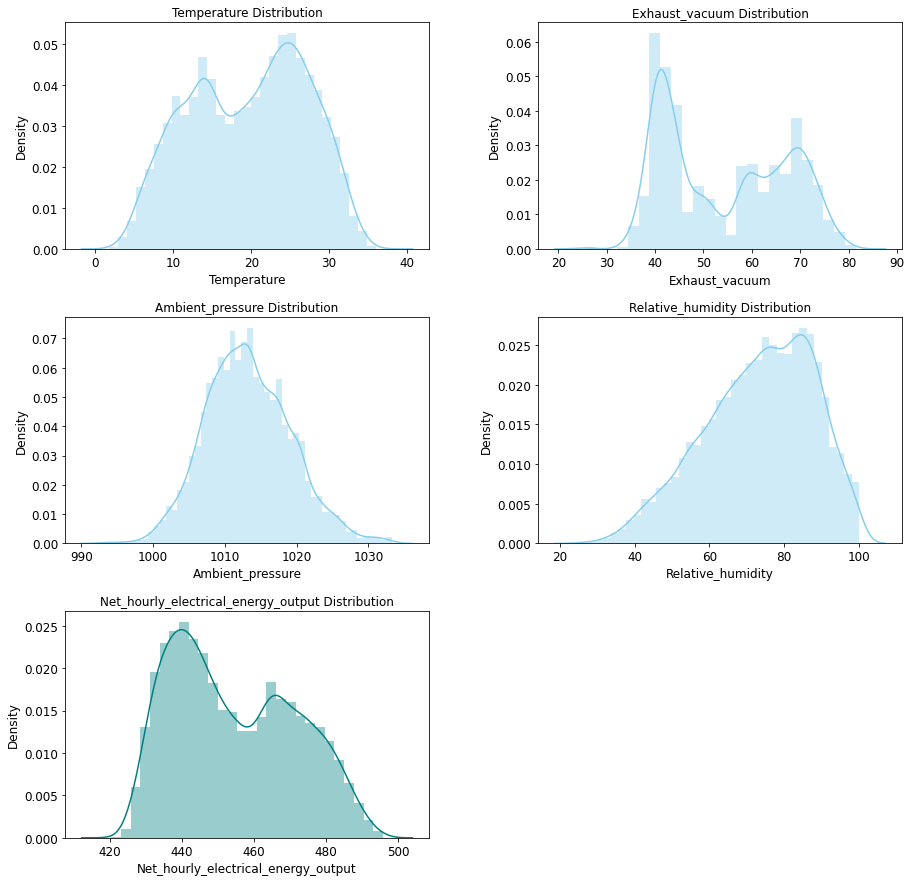

In [ ]:
# plot histograms of all the variables, which are all numerical, to view their distribution

plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)}) # set plot parameters
f1, axes = plt.subplots(3, 2)
sns.distplot(plant_df["Temperature"], color="skyblue", ax=axes[0, 0])
axes[0,0].set_title("Temperature Distribution",fontsize=12)
sns.distplot(plant_df["Exhaust_vacuum"], color="skyblue", ax=axes[0, 1])
axes[0,1].set_title("Exhaust_vacuum Distribution",fontsize=12)
sns.distplot(plant_df["Ambient_pressure"], color="skyblue", ax=axes[1, 0])
axes[1,0].set_title("Ambient_pressure Distribution",fontsize=12)
sns.distplot(plant_df["Relative_humidity"], color="skyblue", ax=axes[1, 1])
axes[1,1].set_title("Relative_humidity Distribution",fontsize=12)
sns.distplot(plant_df["Net_hourly_electrical_energy_output"], color="teal", ax=axes[2, 0])
axes[2,0].set_title("Net_hourly_electrical_energy_output Distribution",fontsize=12)
axes[2,1].set_axis_off() # discard the extra subplot
plt.subplots_adjust(hspace=0.3, wspace=0.3) # set layout

plt.show() # show plots

For the Net hourly electrical energy output Distribution it is the only dependent variable out of the others.  On the bottom for the values 420, 440, 460, and 480 it is showing how much electrical output the distribution is producing in the plant.  On the left is the density of the electrical output for the Distribution.  For the output at 420 the density is very low but as it keeps going to 440, the density goes to its highest peak, then slowly goes back down.       

This would mean during the observations at key moments the output would spike at those moments.  